In [2]:
# 2020-01-28
# Versoes em uso: eram
# NumPy: 1.17.4  verificar
# SciPy: 1.3.1   verificar

import numpy as np
import numpy.ma as ma  # masked array
from machine_selection import set_screen_size_by_machine

# 2019-03-15
# https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html
import pandas as pd
import csv
from collections import defaultdict

# 2019-11-06
import time

# 2020-01-29
import timeit

# 2019-11-03
from filebatch_class import (FileBatch)

# 2019-03-09
from gamma_spectrum_class import (Spec)

# 2019-09-16
from gauss_funcs import gaus_fw, gaus_sig

np.random.random(100)

# 2019-07-15
# https://docs.scipy.org/doc/numpy/reference/routines.polynomials.classes.html#basics
from numpy.polynomial import Polynomial as P
from numpy.polynomial.polynomial import (polyfit, polyval)

from scipy.signal import (cwt, ricker, find_peaks, find_peaks_cwt, peak_widths, convolve, correlate, csd, periodogram, welch)
from scipy.ndimage import (label, generate_binary_structure, find_objects, center_of_mass)  # 2019-09-18
from scipy.linalg import (norm)
from scipy.spatial.distance import (pdist, cdist)
from scipy.fft import (fft, rfft)

from scipy.optimize import (curve_fit, root, lsq_linear, minimize)
from scipy.stats import (iqr)
from scipy.special import (expit)
# 2020-09-26: Obsoleto: substituir os pacotes seguintes
# import base_line_funcs as blf
# import spectra_regions_funcs as spreg

import matplotlib.pyplot as plt

# frm spectra_regions_funcs import (total_analysis2)
import csv
import pickle
from bokeh.models import ColumnDataSource, Whisker, Range1d, LabelSet, Label
from bokeh.plotting import figure, output_file, output_notebook, show
from bokeh import palettes

Matplotlib is building the font cache; this may take a moment.


In [3]:
def spectr_transf(ai, *args):
    specRef  = args[0]
    specTest = args[1]
    a0=ai[0]
    a1=ai[1]
    a2=ai[2]
    transSpecTest = [a0,0] + ([a1,1]+[a2,0]*specTest) * specTest
    signif = 1.0
    for i, pair in enumerate(specRef):
        compareChan = int(np.round(transSpecTest[i][0]))
        if compareChan in (0,4095):
            prodCnts = transSpecTest[i][1] * specRef[compareChan][1]
            signif += np.log(prodCnts + 1.0)
    return 1.0e6 / signif

In [4]:
def spectr_transf_lin(ai, *args):
    specRef  = args[0]
    specTest = args[1]
    a0=ai[0]
    a1=ai[1]
    transSpecTest = [a0,0] + [a1,1] * specTest
    signif = 1.0
    for i, pair in enumerate(specRef):
        compareChan = int(np.round(transSpecTest[i][0]))
        if compareChan in (0,4095):
            prodCnts = transSpecTest[i][1] * specRef[compareChan][1]
            signif += np.log(prodCnts + 1.0)
    return 1.0e6 / signif

In [5]:
##################################################

## 2019-nov-warp2.ipynb
## P.P.
## 2019-11-03: Integrando an'alise em lote de 2019_big-histogram.ipynb 
## com an'alise Cwt+ridges de 2019-cwt-analysis-real_with_effic-curve-Pandas.ipynb

fb = FileBatch()
spec = Spec()

In [6]:
fb.slotSetBatchCHN(
    '../Genie_Transfer/Si'
)

../Genie_Transfer/Si


In [7]:
# print (fb.arqslist)
print (fb.numarqstxt, ' arquivos')

Num de arquivos:       1134 


  arquivos


In [8]:
np.random.random(100)

array([0.36069542, 0.35080071, 0.83384469, 0.25815878, 0.75287315,
       0.13728329, 0.62102681, 0.14622605, 0.47483204, 0.96243379,
       0.21965792, 0.41715962, 0.29997723, 0.96850986, 0.23542411,
       0.16754159, 0.45975927, 0.65998408, 0.11519782, 0.72478498,
       0.23845334, 0.00432956, 0.14295189, 0.43702656, 0.29421492,
       0.89979068, 0.6468356 , 0.34547853, 0.53784945, 0.57998874,
       0.4695961 , 0.40568577, 0.10429252, 0.76823699, 0.16185662,
       0.52840961, 0.04822396, 0.47636647, 0.47728587, 0.90316775,
       0.30253793, 0.40580188, 0.9111887 , 0.68330163, 0.50585835,
       0.06774337, 0.02696817, 0.11890372, 0.29923128, 0.87127187,
       0.31580193, 0.1762727 , 0.38370747, 0.76293614, 0.66168423,
       0.4168983 , 0.81134507, 0.98438607, 0.91744814, 0.76471339,
       0.1975    , 0.91681126, 0.13280828, 0.23193537, 0.03809236,
       0.49028028, 0.44434043, 0.31118738, 0.69071029, 0.14234744,
       0.90963352, 0.97462941, 0.26142288, 0.26089599, 0.01278

In [9]:
# https://numpy.org/doc/1.17/reference/random/generated/numpy.random.Generator.integers.html
rng = np.random.default_rng()
# rng.integers(100, size=10)
cemarqs = rng.integers(fb.numarqs, size=100)
cemarqs

array([ 486,  695,  779,  787,  768,  696,  109,  139,  163,  386,  327,
        207,  173,  173,  918,  264,  999,   67,  738,  994, 1113, 1071,
       1117,  552,  515,  245,  160,  610,  673,  655,  507, 1050, 1110,
        721,  909,  495,  792,  422,  395,  917,  347, 1014,  173,  265,
        257,  384,   79,   54,  918,  756,  148, 1011,  321,  926,   53,
        778,  192,  136,  550,  963,  478,  426,  310,  934,  580,  875,
        528, 1046,  727,  238,  972,  164,  781,  190,  201,  720,  622,
        957, 1112,  724,  954, 1018, 1031, 1103,  666,  697,  960,  968,
        548,  623,  386,  340,  103,  866,  537,  181, 1021, 1108,  138,
        875])

In [10]:
indicetreze = cemarqs[13]
# 2019-12-14 Vou fixar o indicetreze em 162. Espectro de bombona, bem legal. Para isso, habilitar:
# indicetreze = 162
# 2020-01-28 J'a n~ao 'e mais isso. Agora farei convolu'c~ao de dois espectros.
indicetreze

173

In [11]:
# Bom indice 13:
indicetreze = 474

In [12]:
arq_treze = fb.lp[indicetreze]
arq_treze

'../Genie_Transfer/Si/si2012/SI 13912.Chn'

In [13]:
aleator_spec = Spec()
aleator_spec.readSp(arq_treze)

4096

In [16]:
y0s = aleator_spec.y0s
chans = np.asarray(list(range(len(y0s))))
arrSpecRef = np.asarray([chans, y0s])

In [17]:
arrSpecRef

array([[   0,    1,    2, ..., 4093, 4094, 4095],
       [   0,    0,    0, ...,    0,    1,    0]])

In [18]:
arrSpecRef.shape

(2, 4096)

In [20]:
# arrSpecTest = arrSpecRef.copy()

indicequinze = cemarqs[15]

# Bom indice 15
indicequinze = 834

print(fb.lp[indicequinze])

spec = Spec()
spec.readSp(fb.lp[indicequinze])
arrSpecTest = np.asarray([np.asarray(list(range(len(y0s)))), y0s])

arrSpecTest.shape

../Genie_Transfer/Si/Si2005/05005.CHN


(2, 4096)

In [21]:
arrSpecRef[1].shape

(4096,)

In [22]:
arrSpecTest[1].shape

(4096,)

In [23]:
# 2020-01-28
# Gr'aficos:
default_plot_width, default_plot_height = set_screen_size_by_machine()

In [24]:
t1 = time.time()
t1

1601165116.421857

In [25]:
h = cdist(arrSpecTest.T, arrSpecRef.T)
h

array([[0.00000000e+00, 1.00000000e+00, 2.00000000e+00, ...,
        4.09300000e+03, 4.09400012e+03, 4.09500000e+03],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        4.09200000e+03, 4.09300012e+03, 4.09400000e+03],
       [2.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        4.09100000e+03, 4.09200012e+03, 4.09300000e+03],
       ...,
       [4.09300000e+03, 4.09200000e+03, 4.09100000e+03, ...,
        0.00000000e+00, 1.41421356e+00, 2.00000000e+00],
       [4.09400012e+03, 4.09300012e+03, 4.09200012e+03, ...,
        1.41421356e+00, 0.00000000e+00, 1.41421356e+00],
       [4.09500000e+03, 4.09400000e+03, 4.09300000e+03, ...,
        2.00000000e+00, 1.41421356e+00, 0.00000000e+00]])

In [26]:
h.shape

(4096, 4096)

In [27]:
hdiag = h.diagonal()
hdiag

array([0., 0., 0., ..., 0., 0., 0.])

In [28]:
t2 = time.time()
t2

1601165127.6940498

In [29]:
sum(hdiag)

0.0

In [30]:
t3 = time.time()
t3

1601165154.455577

In [31]:
h3 = np.sum((arrSpecTest.T - arrSpecRef.T)**2,axis=1)

In [32]:
t4 = time.time()
t4

1601165156.0486472

In [33]:
norm(arrSpecTest.T - arrSpecRef.T)

0.0

In [34]:
sum(h3)

0

In [35]:
t1

1601165116.421857

In [36]:
t2

1601165127.6940498

In [37]:
t2-t1

11.27219271659851

In [38]:
t3

1601165154.455577

In [39]:
t4

1601165156.0486472

In [40]:
t4-t3

1.5930702686309814

In [41]:
specTest = arrSpecTest.T
specTest

array([[   0,    0],
       [   1,    0],
       [   2,    0],
       ...,
       [4093,    0],
       [4094,    1],
       [4095,    0]])

In [42]:
specRef = arrSpecRef.T
specRef

array([[   0,    0],
       [   1,    0],
       [   2,    0],
       ...,
       [4093,    0],
       [4094,    1],
       [4095,    0]])

In [43]:
# signal 1 and 2:
s1 = arrSpecRef[1]
s2real = arrSpecTest[1]
xs = list(range(len(s1)))

s2art03 = np.zeros(len(s1))
# Tentando espectros deslocados artificialmente:
for i in range(3, len(s2art03)-1):
    s2art03[i] = s1[i-3]
    
s2art07 = np.zeros(len(s1))
# Tentando espectros deslocados artificialmente:
for i in range(7, len(s2art07)-1):
    s2art07[i] = s1[i-7]
    
s2art15 = np.zeros(len(s1))
# Tentando espectros deslocados artificialmente:
for i in range(15, len(s2art15)-1):
    s2art15[i] = s1[i-15]
    
s2art50 = np.zeros(len(s1))
# Tentando espectros deslocados artificialmente:
for i in range(50, len(s2art50)-1):
    s2art50[i] = s1[i-50]
    
s2artdot9 = np.zeros(len(s1))
# Tentando espectros deslocados artificialmente:
for i in range(len(s2artdot9)-1):
    s2artdot9[i] = s1[int(np.round(0.8*i))]
    
s2art15dot9 = np.zeros(len(s1))
# Tentando espectros deslocados artificialmente:
for i in range(15, len(s2artdot9)-1):
    s2art15dot9[i] = s2artdot9[int(np.round(0.8*i))-15]   

In [44]:
fs2real,  crosss2real  = csd(s1, s2real)
fs2art03, crosss2art03 = csd(s1, s2art03)
fs2art07, crosss2art07 = csd(s1, s2art07)
fs2art15, crosss2art15 = csd(s1, s2art15)
fs2art50, crosss2art50 = csd(s1, s2art50)
fs2artdot9, crosss2artdot9 = csd(s1, s2artdot9)
fs2art15dot9, crosss2art15dot9 = csd(s1, s2art15dot9)

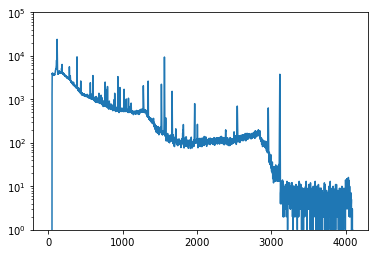

In [45]:
plt.semilogy(xs, s1)
plt.ylim([1, 1e5])
plt.show()

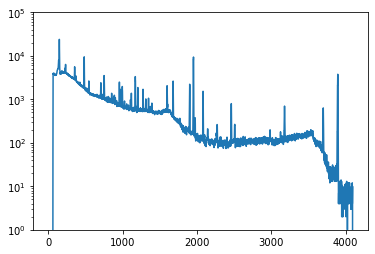

In [46]:
plt.semilogy(xs, s2artdot9)
plt.ylim([1, 1e5])
plt.show()

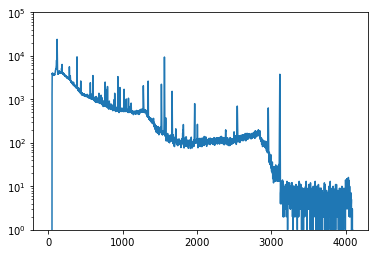

In [47]:
plt.semilogy(xs, s2real)
plt.ylim([1, 1e5])
plt.show()

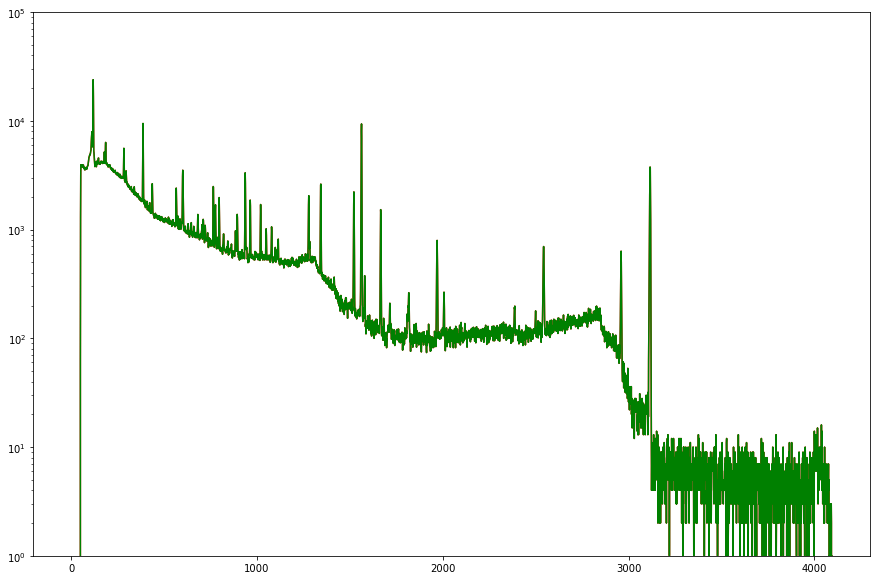

In [48]:
plt.figure(figsize=(15, 10))
plt.semilogy(xs, s1, 'r', xs, s2real, 'g')
plt.ylim([1, 1e5])
plt.show()

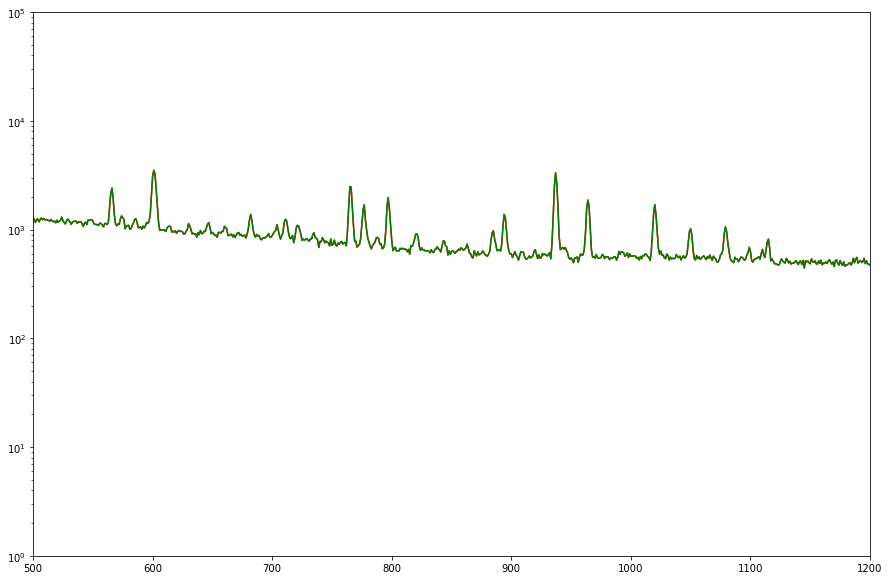

In [49]:
plt.figure(figsize=(15, 10))
plt.semilogy(xs, s1, 'r', xs, s2real, 'g')
plt.ylim([1, 1e5])
plt.xlim([500, 1200])
plt.show()

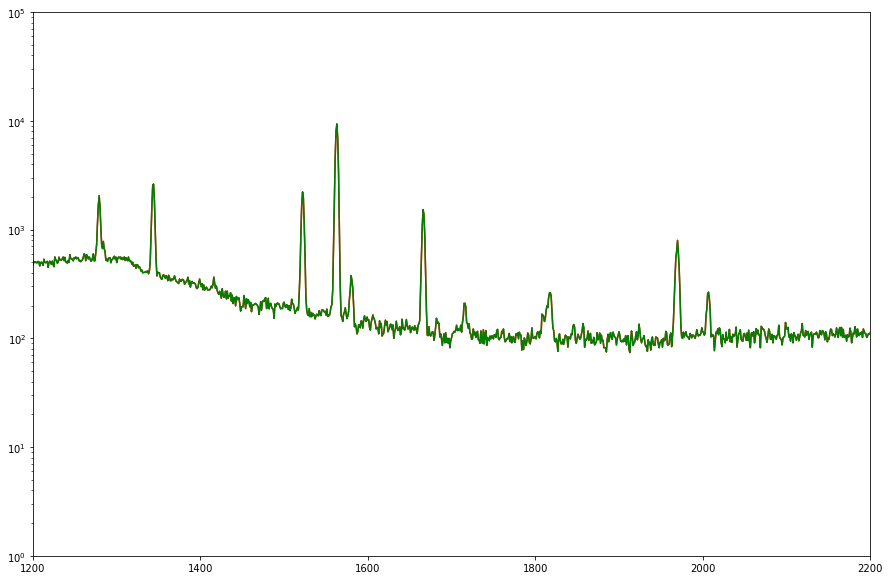

In [50]:
plt.figure(figsize=(15, 10))
plt.semilogy(xs, s1, 'r', xs, s2real, 'g')
plt.ylim([1, 1e5])
plt.xlim([1200, 2200])
plt.show()

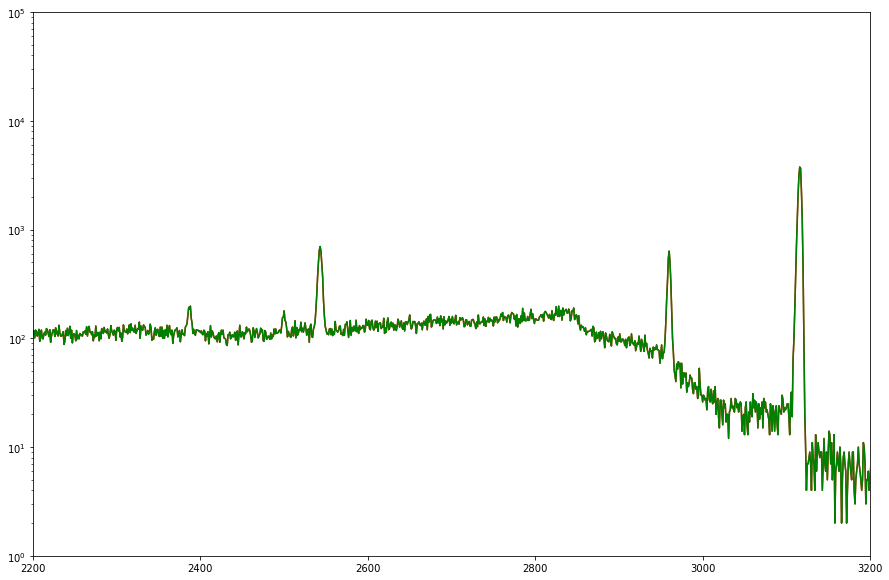

In [51]:
plt.figure(figsize=(15, 10))
plt.semilogy(xs, s1, 'r', xs, s2real, 'g')
plt.ylim([1, 1e5])
plt.xlim([2200, 3200])
plt.show()

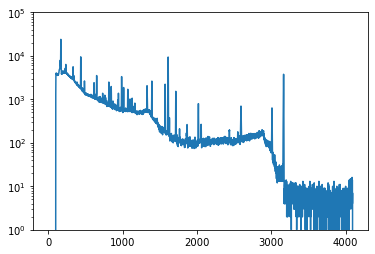

In [52]:
plt.semilogy(xs, s2art50)
plt.ylim([1, 1e5])
plt.show()

In [53]:
fs2, crosss2 = fs2real, crosss2real

In [54]:
fafou = np.abs(fft(crosss2))
np.max(fafou)

125583939.33703437

In [55]:
faarg = np.argmax(fafou)
faarg

0

In [56]:
ran = fafou [faarg-6:faarg+7]
ran

array([], dtype=float64)

In [57]:
center_of_mass(ran)

/home/marcelo/anaconda3/lib/python3.7/site-packages/scipy/ndimage/measurements.py:1386: RuntimeWarning: invalid value encountered in double_scalars
  for dir in range(input.ndim)]


(nan,)

In [54]:
fs2[faarg-1:faarg+2]

array([0.04296875, 0.046875  , 0.05078125])

In [55]:
0.0465 * 4006

186.279

In [56]:
plt.figure(figsize=(15, 5))

plt.subplot(1327/0...21)
plt.semilogy(fs2, np.abs(crosss2))
plt.subplot(122)
plt.plot(fs2, np.angle(crosss2))
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(fs2, np.real(crosss2), 'r', fs2real, np.imag(crosss2), 'g')
plt.subplot(132)
plt.plot(fs2, np.abs(fft(crosss2)), 'r')
plt.subplot(133)
plt.plot(fs2, np.angle(fft(crosss2)) + np.pi, 'r')
plt.show()

SyntaxError: invalid syntax (<ipython-input-56-fdef447a33e2>, line 3)

In [ ]:
fs2, crosss2 = fs2art03, crosss2art03

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.semilogy(fs2, np.abs(crosss2))
plt.subplot(122)
plt.plot(fs2, np.angle(crosss2))
plt.show()
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(fs2, np.real(crosss2), 'r', fs2real, np.imag(crosss2), 'g')
plt.subplot(132)
plt.plot(fs2, np.abs(fft(crosss2)), 'r')
plt.subplot(133)
plt.plot(fs2, np.angle(fft(crosss2)) + np.pi, 'r')
plt.show()

In [ ]:
fs2, crosss2 = fs2art07, crosss2art07

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.semilogy(fs2, np.abs(crosss2))
plt.subplot(122)
plt.plot(fs2, np.angle(crosss2))
plt.show()
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(fs2, np.real(crosss2), 'r', fs2real, np.imag(crosss2), 'g')
plt.subplot(132)
plt.plot(fs2, np.abs(fft(crosss2)), 'r')
plt.subplot(133)
plt.plot(fs2, np.angle(fft(crosss2)) + np.pi, 'r')
plt.show()

In [ ]:
fs2, crosss2 = fs2art15, crosss2art15

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.semilogy(fs2, np.abs(crosss2))
plt.subplot(122)
plt.plot(fs2, np.angle(crosss2))
plt.show()
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(fs2, np.real(crosss2), 'r', fs2real, np.imag(crosss2), 'g')
plt.subplot(132)
plt.plot(fs2, np.abs(fft(crosss2)), 'r')
plt.subplot(133)
plt.plot(fs2, np.angle(fft(crosss2)) + np.pi, 'r')
plt.show()

In [ ]:
fs2, crosss2 = fs2art50, crosss2art50

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.semilogy(fs2, np.abs(crosss2))
plt.subplot(122)
plt.plot(fs2, np.angle(crosss2))
plt.show()
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(fs2, np.real(crosss2), 'r', fs2real, np.imag(crosss2), 'g')
plt.subplot(132)
plt.plot(fs2, np.abs(fft(crosss2)), 'r')
plt.subplot(133)
plt.plot(fs2, np.angle(fft(crosss2)) + np.pi, 'r')
plt.show()

In [ ]:
fs2, crosss2 = fs2artdot9, crosss2artdot9

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.semilogy(fs2, np.abs(crosss2))
plt.subplot(122)
plt.plot(fs2, np.angle(crosss2))
plt.show()
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(fs2, np.real(crosss2), 'r', fs2real, np.imag(crosss2), 'g')
plt.subplot(132)
plt.plot(fs2, np.abs(fft(crosss2)), 'r')
plt.subplot(133)
plt.plot(fs2, np.angle(fft(crosss2)) + np.pi, 'r')
plt.show()

In [ ]:
fs2, crosss2 = fs2art15dot9, crosss2art15dot9

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.semilogy(fs2, np.abs(crosss2))
plt.subplot(122)
plt.plot(fs2, np.angle(crosss2))
plt.show()
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(fs2, np.real(crosss2), 'r', fs2real, np.imag(crosss2), 'g')
plt.subplot(132)
plt.plot(fs2, np.abs(fft(crosss2)), 'r')
plt.subplot(133)
plt.plot(fs2, np.angle(fft(crosss2)) + np.pi, 'r')
plt.show()